In [1]:
from subject_verb_collocation_net import SubjectVerbCollocationNet

In [2]:
import pickle
import random

In [3]:
from collections import Counter, defaultdict

In [4]:
sv = SubjectVerbCollocationNet()

In [5]:
with open("tagged_lemma.pickle", "rb") as f:
    lemma_tagged = pickle.load(f)

In [6]:
lemma_tagged[:3]

[('08.08.2001', None), ('rüütel', None), ('kadakas', None)]

In [7]:
preds = sv.predict_verb_probabilities("rüütel", number_of_verbs=sv.column_dist.shape[1])

In [8]:
preds[:3]

[('näkkama', 0.31606408758365023),
 ('tärisema', 0.29591024242988256),
 ('kõhutama', 0.24447594999992892)]

In [9]:
tags = [t[1] for t in lemma_tagged]

In [10]:
tags[:3]

[None, None, None]

In [11]:
Counter(tags)

Counter({None: 10474, 'TIME': 892, 'LOC': 667})

In [12]:
Counter([t[1] for t in set(lemma_tagged)])

Counter({None: 3656, 'TIME': 83, 'LOC': 114})

In [13]:
3656+114+83

3853

In [14]:
none = [lem for lem in lemma_tagged if lem[1] is None]
time = [lem for lem in lemma_tagged if lem[1] == 'TIME']
loc = [lem for lem in lemma_tagged if lem[1] == 'LOC']

In [15]:
len(none), len(time), len(loc)

(10474, 892, 667)

In [16]:
none_sample = random.sample(none, 800)

In [17]:
sv.row_index("rüütel")

6083

In [18]:
none_sample_idx = {}

for w, tag in none_sample:
    try:
        idx = sv.row_index(w)
        none_sample_idx[w] = idx
    except:
        continue

In [19]:
time_idx = {}

for w, tag in time:
    try:
        idx = sv.row_index(w)
        time_idx[w] = idx
    except:
        continue

In [20]:
loc_idx = {}

for w, tag in loc:
    try:
        idx = sv.row_index(w)
        loc_idx[w] = idx
    except:
        continue

In [21]:
len(none_sample_idx), len(time_idx), len(loc_idx)

(390, 66, 99)

In [22]:
len(sv.rows), sv.row_dist.shape, sv.column_dist.shape

(15000, (15000, 500), (500, 4156))

In [23]:
row_distribution = sv.row_dist

In [24]:
dists = []
words = []
tags = []

for w, idx in none_sample_idx.items():
    dists.append(row_distribution[idx])
    words.append(w)
    tags.append("NONE")
    
for w, idx in time_idx.items():
    dists.append(row_distribution[idx])
    words.append(w)
    tags.append("TIME")
    
for w, idx in loc_idx.items():
    dists.append(row_distribution[idx])
    words.append(w)
    tags.append("LOC")

In [25]:
len(dists), len(words), len(tags)

(555, 555, 555)

In [26]:
tags[500:510]

['LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC', 'LOC']

### Adj-Noun

In [27]:
from adjective_noun_collocation_net import AdjectiveNounCollocationNet

In [28]:
import pandas as pd

In [29]:
from sklearn.decomposition import PCA

In [30]:
import matplotlib.pyplot as plt

In [31]:
adjnoun = AdjectiveNounCollocationNet()

In [32]:
adjnoun.column_index("rüütel")

3394

In [33]:
none_sample_idx_an = {}

for w, tag in none_sample:
    try:
        idx = adjnoun.column_index(w)
        none_sample_idx_an[w] = idx
    except:
        continue

In [34]:
time_idx_an = {}

for w, tag in time:
    try:
        idx = adjnoun.column_index(w)
        time_idx_an[w] = idx
    except:
        continue

In [35]:
loc_idx_an = {}

for w, tag in loc:
    try:
        idx = adjnoun.column_index(w)
        loc_idx_an[w] = idx
    except:
        continue

In [36]:
len(none_sample_idx_an), len(time_idx_an), len(loc_idx_an)

(378, 70, 103)

In [37]:
len(adjnoun.columns), adjnoun.row_dist.shape, adjnoun.column_dist.shape

(15000, (16115, 1000), (1000, 15000))

In [38]:
adjnoun.column_dist[:, 0].shape

(1000,)

In [39]:
column_distribution = adjnoun.column_dist

In [40]:
dists_an = []
words_an = []
tags_an = []

for w, idx in none_sample_idx_an.items():
    dists_an.append(column_distribution[:, idx])
    words_an.append(w)
    tags_an.append("NONE")
    
for w, idx in time_idx_an.items():
    dists_an.append(column_distribution[:, idx])
    words_an.append(w)
    tags_an.append("TIME")
    
for w, idx in loc_idx_an.items():
    dists_an.append(column_distribution[:, idx])
    words_an.append(w)
    tags_an.append("LOC")

In [41]:
len(dists_an), len(words_an), len(tags_an)

(551, 551, 551)

#### KNN

In [42]:
from sklearn.neighbors import NearestNeighbors

In [43]:
knn = NearestNeighbors(n_neighbors=10)

In [44]:
knn.fit(dists_an)

NearestNeighbors(n_neighbors=10)

In [45]:
knn.kneighbors([dists_an[0]], 10, return_distance=False)

array([[  0, 463, 489, 229, 321, 110,  88, 254, 257, 501]], dtype=int64)

In [46]:
knn.kneighbors([dists_an[0]], 11, return_distance=False)[0][1:]

array([463, 489, 229, 321, 110,  88, 254, 257, 501, 514], dtype=int64)

In [47]:
neighbours = []

for d in dists_an:
    n = knn.kneighbors([d], 11, return_distance=False)[0][1:]
    neighbours.append(n)

In [48]:
pca_knn = PCA(n_components=2)

In [49]:
principalComponents_knn = pca_knn.fit_transform(neighbours)

In [50]:
principalDf_knn = pd.DataFrame(data = principalComponents_knn, columns = ['principal component 1', 'principal component 2'])

In [51]:
principalDf_knn["target"] = tags_an

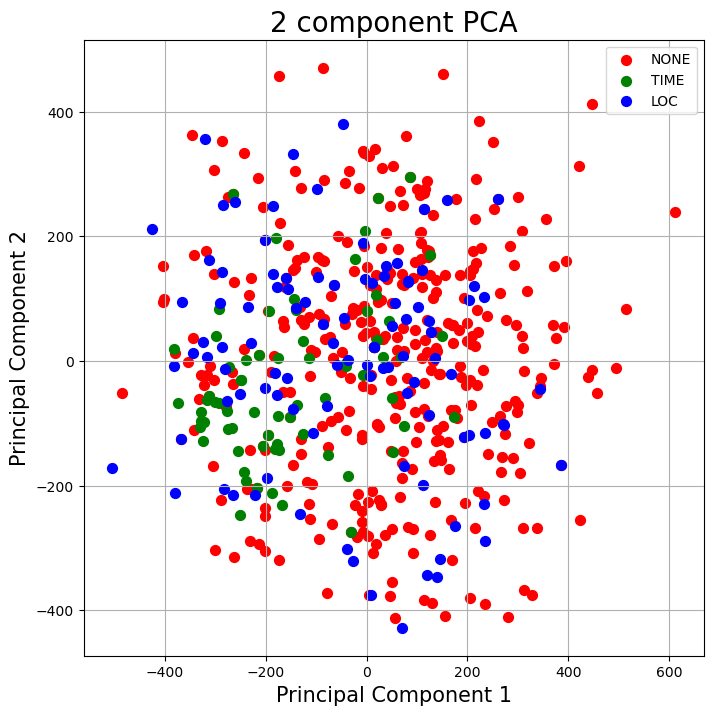

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['NONE', 'TIME', 'LOC']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf_knn['target'] == target
    ax.scatter(principalDf_knn.loc[indicesToKeep, 'principal component 1']
               , principalDf_knn.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Checking nearest neighbours of words

In [53]:
words_an[0]

'saar'

In [54]:
neighbours[0]

array([463, 489, 229, 321, 110,  88, 254, 257, 501, 514], dtype=int64)

In [55]:
words_an[0], words_an[neighbours[0][0]]

('saar', 'saar')

In [56]:
none_an = []
time_an = []
loc_an = []

for i, w in enumerate(words_an):
    if tags_an[i] == "NONE":
        none_an.append(w)
    if tags_an[i] == "TIME":
        time_an.append(w)
    if tags_an[i] == "LOC":
        loc_an.append(w)

In [57]:
random.sample(time_an, 5)

['eluaeg', 'puhk', 'märts', 'pime', 'minut']

In [58]:
random_time = random.sample(time_an, 10)
random_loc = random.sample(loc_an, 10)
random_none = random.sample(none_an, 10)

In [59]:
words_an.index("välismaa")

454

In [60]:
for a in lemma_tagged:
    if a[0] == "november":
        print(a)

('november', 'TIME')
('november', None)
('november', 'TIME')
('november', 'TIME')
('november', 'TIME')
('november', None)
('november', 'TIME')
('november', 'TIME')
('november', 'TIME')
('november', None)
('november', 'TIME')
('november', 'TIME')
('november', 'TIME')
('november', None)
('november', None)
('november', 'TIME')
('november', 'TIME')
('november', 'TIME')
('november', None)


#### Nearest neighbours of random words with the "TIME" tag

In [61]:
random_time_neighbours = []

for t in random_time:
    idx = words_an.index(t)
    random_time_neighbours.append(neighbours[idx])
    print("Word:", t)
    print("Closest neighbours:", [words_an[wi] for wi in neighbours[idx]])
    print("Closest neighbours tags:", [tags_an[wi] for wi in neighbours[idx]])
    print("----------------------")

Word: hooaeg
Closest neighbours: ['suvi', 'suvi', 'sajand', 'hommik', 'sügis', 'reede', 'nädalavahetus', 'õhtu', 'esmaspäev', 'teisipäev']
Closest neighbours tags: ['TIME', 'NONE', 'TIME', 'TIME', 'TIME', 'TIME', 'TIME', 'TIME', 'TIME', 'TIME']
----------------------
Word: tulevik
Closest neighbours: ['tulevik', 'minevik', 'kant', 'nurk', 'naaber', 'ümbrus', 'esivanem', 'sport', 'ümberkorraldus', 'kodumaa']
Closest neighbours tags: ['NONE', 'TIME', 'LOC', 'LOC', 'NONE', 'LOC', 'NONE', 'LOC', 'NONE', 'LOC']
----------------------
Word: esmaspäev
Closest neighbours: ['teisipäev', 'kevade', 'kevad', 'lõige', 'laupäev', 'pühapäev', 'õppeaasta', 'tali', 'nädalavahetus', 'faas']
Closest neighbours tags: ['TIME', 'TIME', 'TIME', 'NONE', 'TIME', 'TIME', 'TIME', 'TIME', 'TIME', 'TIME']
----------------------
Word: päev
Closest neighbours: ['päev', 'kuu', 'kuu', 'hooaeg', 'kord', 'kord', 'hetk', 'minut', 'mäng', 'hommik']
Closest neighbours tags: ['TIME', 'TIME', 'NONE', 'TIME', 'NONE', 'TIME', 

In [62]:
random_time_neighbours[0], words_an.index(random_time[0])

(array([386, 134, 421, 389, 387, 427, 410, 401, 391, 392], dtype=int64), 442)

In [63]:
knn.kneighbors([dists_an[270]], 11, return_distance=False)[0]

array([270, 434, 150, 384, 101, 437, 322, 433, 435, 422, 414], dtype=int64)

In [64]:
words_an[402], words_an[270], words_an[417]

('laupäev', 'tund', 'juunikuu')

#### Nearest neighbours of random words with the "LOC" tag

In [65]:
random_loc_neighbours = []

for t in random_loc:
    idx = words_an.index(t)
    random_loc_neighbours.append(neighbours[idx])
    print("Word:", t)
    print("Closest neighbours:", [words_an[wi] for wi in neighbours[idx]])
    print("Closest neighbours tags:", [tags_an[wi] for wi in neighbours[idx]])
    print("----------------------")

Word: kabinet
Closest neighbours: ['teatrimaja', 'bussijaam', 'aastasada', 'hall', 'koalitsioonileping', 'stuudio', 'looduskaitseala', 'õppetoetus', 'oma', 'paviljon']
Closest neighbours tags: ['NONE', 'NONE', 'NONE', 'LOC', 'NONE', 'LOC', 'LOC', 'NONE', 'NONE', 'LOC']
----------------------
Word: keskkond
Closest neighbours: ['lasteaed', 'rohumaa', 'bussijaam', 'miljöö', 'teatrimaja', 'kontor', 'sadam', 'hall', 'kalender', 'kaitseala']
Closest neighbours tags: ['LOC', 'LOC', 'NONE', 'NONE', 'NONE', 'LOC', 'LOC', 'LOC', 'NONE', 'LOC']
----------------------
Word: kodulinn
Closest neighbours: ['lihakombinaat', 'rahvasaadik', 'vallavolikogu', 'kalatööstus', 'halduskorraldus', 'usinus', 'euroliit', 'töötuba', 'Viljandi', 'omandus']
Closest neighbours tags: ['NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'LOC', 'NONE', 'NONE']
----------------------
Word: parras
Closest neighbours: ['koda', 'Soome', 'väljaselgitamine', 'karjamaa', 'tänapäev', 'sotsiaalsus', 'osutaja', 'Viljandi', 

### Exploring nearest neighbours

In [66]:
len(words_an), len(dists_an), len(tags_an)

(551, 551, 551)

In [67]:
nearest_neighbour_loc = []
nearest_neighbour_time = []

for i, d in enumerate(dists_an):
    if tags_an[i] == "LOC":
        dist, neighborids = knn.kneighbors([d], 2, return_distance=True)
        neighborid = neighborids[0][1]
        nearest_neighbour_loc.append((words_an[i], words_an[neighborid], dist[0][1], tags_an[neighborid]))
    
    if tags_an[i] == "TIME":
        dist, neighborids = knn.kneighbors([d], 2, return_distance=True)
        neighborid = neighborids[0][1]
        nearest_neighbour_time.append((words_an[i], words_an[neighborid], dist[0][1], tags_an[neighborid]))
    

In [68]:
len(nearest_neighbour_loc), len(nearest_neighbour_time)

(103, 70)

In [69]:
time_df = pd.DataFrame(nearest_neighbour_time, columns=["original_word", "nearest_word", "distance", "nearest_word_tag"])

In [70]:
time_df.sort_values(by="distance")

,original_word,nearest_word,distance,nearest_word_tag
0,aasta,aasta,0.000000,TIME
1,tulevik,tulevik,0.000000,TIME
3,kord,kord,0.000000,TIME
46,kuu,kuu,0.000000,TIME
56,tund,tund,0.000000,TIME
...,...,...,...,...
40,minut,aastakümme,1642.704590,TIME
47,öö,õnn,2511.247453,NONE
64,hooaeg,suvi,4195.659575,NONE
26,hetk,minut,4294.665571,TIME


In [71]:
sorteddf = time_df.sort_values(by="distance")

In [72]:
sorteddf[(sorteddf["distance"] != 0) & (sorteddf["original_word"] != sorteddf["nearest_word"]) & (sorteddf["nearest_word_tag"] != "TIME")]

,original_word,nearest_word,distance,nearest_word_tag
51,eluaeg,liiter,13.276496,NONE
25,keskpäev,tänapäev,21.022458,NONE
45,puhkamine,tänapäev,21.840330,NONE
58,pime,tänapäev,21.977261,NONE
48,vahemik,magamistuba,37.205370,LOC
38,september,august,43.747225,NONE
52,ajahetk,kandidaatriik,73.597026,LOC
57,faas,aastasada,149.520921,NONE
6,ööpäev,meeter,178.643614,NONE
61,pööripäev,Tartu,207.796662,NONE


In [73]:
time_df.sort_values(by="distance").to_csv("time_nearest_neighbour.csv", encoding="UTF8")

In [74]:
loc_df = pd.DataFrame(nearest_neighbour_loc, columns=["original_word", "nearest_word", "distance", "nearest_word_tag"])

In [75]:
loc_df.sort_values(by="distance")

,original_word,nearest_word,distance,nearest_word_tag
21,kodu,kodu,0.000000,LOC
3,küla,küla,0.000000,LOC
4,rand,rand,0.000000,LOC
5,maa,maa,0.000000,LOC
28,lähedus,lähedus,0.000000,LOC
...,...,...,...,...
46,liikmesriik,amet,3329.190964,LOC
26,maja,hoone,4826.023921,NONE
72,korter,sild,6136.738793,NONE
23,tee,tänav,6882.490656,NONE


In [76]:
loc_df.sort_values(by="distance").to_csv("loc_nearest_neighbour.csv", encoding="UTF8")

### SVM on KNN

In [77]:
from sklearn.svm import SVC

In [78]:
knn.kneighbors(dists_an, return_distance=False).shape

(551, 10)

In [79]:
len(neighbours), len(tags_an)

(551, 551)

In [80]:
svm = SVC(kernel='rbf')

In [81]:
svm.fit(neighbours, tags_an)

SVC()

In [82]:
svm.predict(neighbours)

array(['NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'TIME', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'TIME', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'TIME',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'TIME', 'NONE', 'NONE',
      

In [83]:
with open("used_lemmas.pickle", "wb") as f:
    pickle.dump(words_an, f)
    
with open("used_tags.pickle", "wb") as f:
    pickle.dump(tags_an, f)

### Word2Vec

In [84]:
!pip install gensim

In [85]:
from gensim.models import Word2Vec

In [86]:
with open("lemmas_with_tags_and_sents.pickle", "rb") as f:
    lemmas_with_tags_and_sents = pickle.load(f)

In [87]:
lemmas_with_tags_and_sents[0]

('raha', 'NONE', 'Rahast jagub nii kevadiseks ekskursiooniks kui palkadeks .')

In [88]:
used_lemmas = [lem for lem, tag, sent in lemmas_with_tags_and_sents]
used_tags = [tag for lem, tag, sent in lemmas_with_tags_and_sents]
used_sents = [sent for lem, tag, sent in lemmas_with_tags_and_sents]

In [89]:
used_lemmas[:3], used_tags[:3], used_sents[:3]

(['raha', 'süsteem', 'muuseum'],
 ['NONE', 'NONE', 'NONE'],
 ['Rahast jagub nii kevadiseks ekskursiooniks kui palkadeks .',
  'Mõned vanad talunikud on uuest süsteemist vaimustuses , nooremad mitte .',
  'Senisest rohkem tähelepanu vääriks arhiivides ja muuseumides säilitatava eesti rahvuskultuuripärandi ( ka mälestuste ) valgustamine , mis meie ajaloos pool sajandit kestnud okupatsiooniperioodil varjusurma oli jäänud .'])

In [90]:
tokenized_sents = [sent.split(" ") for sent in used_sents]

In [91]:
w2v = Word2Vec(sentences=tokenized_sents)

In [92]:
time_lem = []

for i, tag in enumerate(used_tags):
    if tag == "TIME":
        time_lem.append(used_lemmas[i])

In [93]:
time_lem[:5]

['aasta', 'tulevik', 'elu', 'kord', 'puhkus']

In [94]:
w2v.wv.most_similar('aastal', topn=5)

[(',', 0.9881374835968018),
 ('juulil', 0.9878361821174622),
 ('et', 0.9877415299415588),
 ('on', 0.9874491095542908),
 ('Eesti', 0.9874299764633179)]

In [95]:
#w2v.wv.similarity("aastal", "tulevikus")

In [96]:
with open("lemmas_with_tags_and_estnltk_sents.pickle", "rb") as f:
    lemmas_with_tags_and_estnltk_sents = pickle.load(f)

In [97]:
used_estnltk_sents = [sent for lem, tag, sent in lemmas_with_tags_and_estnltk_sents]

In [98]:
used_estnltk_sents[:3]

[Text(text='Rahast jagub nii kevadiseks ekskursiooniks kui palkadeks .'),
 Text(text='Mõned vanad talunikud on uuest süsteemist vaimustuses , nooremad mitte .'),
 Text(text='Senisest rohkem tähelepanu vääriks arhiivides ja muuseumides säilitatava eesti rahvuskultuuripärandi ( ka mälestuste ) valgustamine , mis meie ajaloos pool sajandit kestnud okupatsiooniperioodil varjusurma oli jäänud .')]

In [99]:
for i, sent in enumerate(used_estnltk_sents):
    if len(sent.sentences) > 1:
        print(i, sent)

In [100]:
tokenized_estnltk_sents = [[w.lemma[0] for w in sent.sentences[0]] for sent in used_estnltk_sents]

In [101]:
tokenized_estnltk_sents[0]

['raha', 'jaguma', 'nii', 'kevadine', 'ekskursioon', 'kui', 'palk', '.']

In [102]:
w2v_lem = Word2Vec(sentences=tokenized_estnltk_sents)

INFO:word2vec.py:582: collecting all words and their counts
INFO:word2vec.py:565: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:word2vec.py:588: collected 3333 word types from a corpus of 9623 raw words and 540 sentences
INFO:word2vec.py:637: Creating a fresh vocabulary
INFO:utils.py:448: Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 284 unique words (8.52% of original 3333, drops 3049)', 'datetime': '2023-02-28T17:45:01.889539', 'gensim': '4.3.0', 'python': '3.8.15 (default, Nov 24 2022, 14:38:14) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'prepare_vocab'}
INFO:utils.py:448: Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 5275 word corpus (54.82% of original 9623, drops 4348)', 'datetime': '2023-02-28T17:45:01.889539', 'gensim': '4.3.0', 'python': '3.8.15 (default, Nov 24 2022, 14:38:14) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'prepare_vocab'}
INFO:wor

In [103]:
w2v_lem.wv.most_similar('aasta', topn=5)

[(',', 0.99886155128479),
 ('olema', 0.9985455870628357),
 ('.', 0.9984579682350159),
 ('tema', 0.9984578490257263),
 ('see', 0.9982939958572388)]

In [104]:
for sent in tokenized_estnltk_sents:
    if "tulevik" in sent:
        print(sent)

['praegu', 'olema', 'Eesti', 'ettevõte', 'oma', 'tulevik', 'kindlam', 'kui', 'kümme', 'aasta', 'eest', ',', 'ent', 'väga', 'palju', 'olema', 'väike', ',', 'kuus', 'kuni', 'kümme', 'töötaja', ',', 'kes', 'kõik', 'olema', 'töö', 'ülimalt', 'hõivatud', 'ning', 'kes', 'olema', 'aeg', 'ega', 'oskus', 'noor', 'tegelema', '.']
['kui', 'Artur', 'lenduriamet', 'ei', 'unistama', ',', 'siis', 'Pille', 'kavatsema', 'oma', 'tulevik', 'küll', 'lennundus', 'siduma', ',', 'näiteks', 'stjuardess', 'saama', '.']
['päris', 'kindel', 'olema', ',', 'et', 'terve', 'rida', 'asi', ',', 'mis', 'olema', 'oluline', 'mina', 'tulevik', ',', 'olema', 'tegema', 'teisiti', '.']


In [105]:
w2v_lem.wv.similarity("aasta", "päev")

0.9952384

In [106]:
prob_pairs = []

for i, lem in enumerate(time_lem):
    for j in range(i+1, len(time_lem)):
        try:
            sim = w2v_lem.wv.similarity(lem, time_lem[j])
            prob_pairs.append((lem, time_lem[j], sim))
        except:
            print(f"{lem} or {time_lem[j]} not found in model")

aasta or tulevik not found in model
aasta or puhkus not found in model
aasta or lõpp not found in model
aasta or ööpäev not found in model
aasta or sügis not found in model
aasta or esmaspäev not found in model
aasta or teisipäev not found in model
aasta or aprill not found in model
aasta or november not found in model
aasta or märts not found in model
aasta or ajalugu not found in model
aasta or õhtu not found in model
aasta or laupäev not found in model
aasta or keskpäev not found in model
aasta or hetk not found in model
aasta or pühapäev not found in model
aasta or tali not found in model
aasta or süda not found in model
aasta or kuupäev not found in model
aasta or detsember not found in model
aasta or nädalavahetus not found in model
aasta or oktoober not found in model
aasta or tööaeg not found in model
aasta or kevad not found in model
aasta or pärastlõuna not found in model
aasta or aken not found in model
aasta or september not found in model
aasta or juunikuu not found in mod

In [107]:
len(prob_pairs)

120

In [108]:
sorted(prob_pairs, key=lambda x: x[-1], reverse=True)

[('juuni', 'juuli', 0.9986461),
 ('aasta', 'juuni', 0.99824226),
 ('aasta', 'juuli', 0.99796295),
 ('mai', 'juuni', 0.9978193),
 ('aasta', 'mai', 0.99757135),
 ('mai', 'juuli', 0.9975127),
 ('aeg', 'juuli', 0.99750364),
 ('juuni', 'august', 0.997443),
 ('aasta', 'august', 0.9974021),
 ('aeg', 'juuni', 0.9973584),
 ('aasta', 'aeg', 0.9973258),
 ('nädal', 'juuni', 0.9971934),
 ('kord', 'juuli', 0.99699265),
 ('nädal', 'juuli', 0.9969472),
 ('juuli', 'august', 0.9969133),
 ('aeg', 'mai', 0.9968971),
 ('mai', 'august', 0.9967401),
 ('kord', 'juuni', 0.99672973),
 ('juuni', 'tund', 0.99663293),
 ('nädal', 'august', 0.9965647),
 ('aeg', 'august', 0.996502),
 ('aasta', 'kord', 0.9964931),
 ('juuli', 'tund', 0.99648774),
 ('aasta', 'nädal', 0.9964604),
 ('aasta', 'tund', 0.9964247),
 ('suvi', 'juuli', 0.99641013),
 ('suvi', 'juuni', 0.99639857),
 ('kord', 'aeg', 0.9962414),
 ('aeg', 'nädal', 0.99604857),
 ('mai', 'tund', 0.9960413),
 ('mai', 'nädal', 0.9960145),
 ('aeg', 'suvi', 0.99597204),
 

In [109]:
loc_lem = []

for i, tag in enumerate(used_tags):
    if tag == "LOC":
        loc_lem.append(used_lemmas[i])

In [110]:
time_loc_prob_pairs = []

for i, lem in enumerate(time_lem):
    for j, lem2 in enumerate(loc_lem):
        try:
            sim = w2v_lem.wv.similarity(lem, lem2)
            time_loc_prob_pairs.append((lem, lem2, sim))
        except:
            print(f"{lem} or {lem2} not found in model")

aasta or eriala not found in model
aasta or rand not found in model
aasta or amet not found in model
aasta or põld not found in model
aasta or muld not found in model
aasta or ümbrus not found in model
aasta or mander not found in model
aasta or piirkond not found in model
aasta or kallas not found in model
aasta or saar not found in model
aasta or territoorium not found in model
aasta or ala not found in model
aasta or töötuba not found in model
aasta or turg not found in model
aasta or vastuvõtt not found in model
aasta or eeter not found in model
aasta or linn not found in model
aasta or maja not found in model
aasta or park not found in model
aasta or lähedus not found in model
aasta or torn not found in model
aasta or õu not found in model
aasta or kabinet not found in model
aasta or ruum not found in model
aasta or tuba not found in model
aasta or töökoht not found in model
aasta or kontor not found in model
aasta or regioon not found in model
aasta or saal not found in model
aas

minut or eriala not found in model
minut or rand not found in model
minut or amet not found in model
minut or põld not found in model
minut or muld not found in model
minut or ümbrus not found in model
minut or mander not found in model
minut or piirkond not found in model
minut or kallas not found in model
minut or saar not found in model
minut or territoorium not found in model
minut or ala not found in model
minut or töötuba not found in model
minut or turg not found in model
minut or vastuvõtt not found in model
minut or eeter not found in model
minut or linn not found in model
minut or maja not found in model
minut or park not found in model
minut or lähedus not found in model
minut or torn not found in model
minut or õu not found in model
minut or kabinet not found in model
minut or ruum not found in model
minut or tuba not found in model
minut or töökoht not found in model
minut or kontor not found in model
minut or regioon not found in model
minut or saal not found in model
min

In [111]:
len(time_loc_prob_pairs)

208

In [112]:
sorted(time_loc_prob_pairs, key=lambda x: x[-1], reverse=True)

[('juuni', 'Euroopa', 0.997524),
 ('juuni', 'riik', 0.99738735),
 ('juuli', 'riik', 0.997341),
 ('aasta', 'riik', 0.99729836),
 ('aeg', 'riik', 0.9972004),
 ('juuli', 'Euroopa', 0.9971939),
 ('mai', 'Euroopa', 0.996871),
 ('aeg', 'Euroopa', 0.99682504),
 ('aasta', 'Euroopa', 0.9968219),
 ('mai', 'riik', 0.9965447),
 ('nädal', 'riik', 0.9964516),
 ('august', 'riik', 0.9964253),
 ('kord', 'Euroopa', 0.99641347),
 ('kord', 'riik', 0.9963934),
 ('juuli', 'maa', 0.9962538),
 ('juuni', 'küla', 0.9962535),
 ('suvi', 'riik', 0.9960516),
 ('nädal', 'Euroopa', 0.99604),
 ('suvi', 'Euroopa', 0.9958589),
 ('juuni', 'maa', 0.99582464),
 ('august', 'Euroopa', 0.995795),
 ('mai', 'küla', 0.9955574),
 ('aasta', 'küla', 0.99549925),
 ('juuli', 'küla', 0.99548674),
 ('juuni', 'töö', 0.995354),
 ('tund', 'riik', 0.9952662),
 ('aasta', 'töö', 0.9952445),
 ('juuli', 'töö', 0.9951633),
 ('mai', 'maa', 0.995101),
 ('aeg', 'maa', 0.9950825),
 ('päev', 'riik', 0.9950586),
 ('tund', 'Euroopa', 0.99491966),
 ('a

In [113]:
len(tokenized_estnltk_sents)

540

In [114]:
len(time_lem), len(loc_lem)

(70, 103)

In [115]:
none_lem = []

for i, tag in enumerate(used_tags):
    if tag == "NONE":
        none_lem.append(used_lemmas[i])

In [116]:
len(none_lem)

367

In [117]:
time_none_prob_pairs = []

for i, lem in enumerate(time_lem):
    for j, lem2 in enumerate(none_lem):
        try:
            sim = w2v_lem.wv.similarity(lem, lem2)
            time_none_prob_pairs.append((lem, lem2, sim))
        except:
            print(f"{lem} or {lem2} not found in model")

aasta or süsteem not found in model
aasta or muuseum not found in model
aasta or talumees not found in model
aasta or linnus not found in model
aasta or kolmikliit not found in model
aasta or ulatus not found in model
aasta or nõunik not found in model
aasta or vorm not found in model
aasta or soovija not found in model
aasta or põhjus not found in model
aasta or täitevkomitee not found in model
aasta or konverents not found in model
aasta or pealehakkamine not found in model
aasta or jumal not found in model
aasta or haigus not found in model
aasta or äikesetorm not found in model
aasta or plahvatus not found in model
aasta or sein not found in model
aasta or keel not found in model
aasta or tase not found in model
aasta or saak not found in model
aasta or riigikogu not found in model
aasta or kontsert not found in model
aasta or kohtumine not found in model
aasta or tegemine not found in model
aasta or tulu not found in model
aasta or käsi not found in model
aasta or kell not found i

kuu or kogumaksumus not found in model
kuu or reis not found in model
kuu or protsess not found in model
kuu or signaal not found in model
kuu or hõlm not found in model
kuu or esindaja not found in model
kuu or valdus not found in model
kuu or olend not found in model
kuu or liising not found in model
kuu or kool not found in model
kuu or laienemine not found in model
kuu or ratas not found in model
kuu or avatus not found in model
kuu or lett not found in model
kuu or haigla not found in model
kuu or koosolek not found in model
kuu or värv not found in model
kuu or uuring not found in model
kuu or konts not found in model
kuu or õlu not found in model
kuu or põud not found in model
kuu or tudeng not found in model
kuu or lugemine not found in model
kuu or seadusloome not found in model
kuu or puur not found in model
kuu or lehm not found in model
kuu or paragrahv not found in model
kuu or pruut not found in model
kuu or poja not found in model
kuu or hinnang not found in model
kuu or

In [118]:
len(time_none_prob_pairs)

1168

In [119]:
sorted(time_none_prob_pairs, key=lambda x: x[-1], reverse=True)[:20]

[('aasta', 'aasta', 1.0),
 ('elu', 'elu', 1.0),
 ('kord', 'kord', 1.0),
 ('aeg', 'aeg', 1.0),
 ('päev', 'päev', 1.0),
 ('nädal', 'nädal', 1.0),
 ('juuli', 'juuli', 1.0),
 ('august', 'august', 1.0),
 ('minut', 'minut', 1.0),
 ('kuu', 'kuu', 1.0),
 ('tund', 'tund', 1.0),
 ('suvi', 'suvi', 0.99999994),
 ('juuni', 'juuli', 0.9986461),
 ('juuni', 'oma', 0.9986403),
 ('juuli', 'oma', 0.9982697),
 ('juuli', 'mina', 0.99824834),
 ('juuni', 'aasta', 0.99824226),
 ('juuli', 'Eesti', 0.99820983),
 ('juuni', 'mina', 0.998067),
 ('juuni', 'Eesti', 0.99805945)]

In [120]:
sorted(time_none_prob_pairs, key=lambda x: x[-1], reverse=False)[:20]

[('kuu', 'Soome', 0.86583066),
 ('sajand', 'Soome', 0.8738901),
 ('hommik', 'Soome', 0.87961817),
 ('tund', 'Soome', 0.90384686),
 ('päev', 'Soome', 0.9060249),
 ('nädal', 'Soome', 0.9065844),
 ('august', 'Soome', 0.908003),
 ('aeg', 'Soome', 0.90920067),
 ('juuli', 'Soome', 0.90961945),
 ('kord', 'Soome', 0.9099133),
 ('aasta', 'Soome', 0.9102411),
 ('suvi', 'Soome', 0.91031647),
 ('mai', 'Soome', 0.9104953),
 ('juuni', 'Soome', 0.91068876),
 ('elu', 'Soome', 0.91122043),
 ('minut', 'Soome', 0.91129875),
 ('kuu', 'Venemaa', 0.9128763),
 ('sajand', 'Venemaa', 0.9231919),
 ('hommik', 'Venemaa', 0.9382639),
 ('kuu', 'pea', 0.94297904)]

In [121]:
lemmas_with_tags_and_estnltk_sents[0]

('raha',
 'NONE',
 Text(text='Rahast jagub nii kevadiseks ekskursiooniks kui palkadeks .'))

In [122]:
for lem, tag, sent in lemmas_with_tags_and_estnltk_sents:
    if lem in ["aasta", "elu", "kord", "aeg", "päev", "nädal", "juuli", "august", "minut", "kuu", "tund", "suvi"]:
        if tag == "NONE":
            print(lem, sent.text, "\n")

aasta Ei ole vist patt , kui võtta Arnold Rüütli elu viimatised üheksa aastat kokku nii . 

elu 1970. aastatel tippnomenklatuuri jõudnud Arnold Rüütel on oma elu jooksul palju asju teinud , palju asju korda ajanud . 

päev Nobenäpp korjab päevaga 40 kilo . 

kord 1970. aastatel tippnomenklatuuri jõudnud Arnold Rüütel on oma elu jooksul palju asju teinud , palju asju korda ajanud . 

nädal Üks vahetus kestab kolm nädalat . 

suvi Esimeste suvedega tõestasime , et tulemused on head . 

aeg On õige öelda , et paljud maainimesed räägivad Rüütlist heldimusega , tema aega on ju võrreldud lausa vana hea Rootsi ajaga . 

tund Lehmal peab olema ühesugune täisväärtuslik sööt ees 24 tundi ööpäevas . 

minut Teisipäeval mõni minut pärast kella kahte kärgatas Kohtla-Järvel Jõhvi üksik-päästekompanii territooriumil võimas plahvatus , mis tappis ühe ajateenija ja vigastas teist . 

kuu Keskuse eelarve on tänavu üheksaks kuuks 7,8 mln krooni , millest 3,3 mln on ühistranspordi riigitoetus , 1,3 mln va

### Estonian Word2Vec

In [123]:
from gensim.models import KeyedVectors
from gensim import models

In [124]:
eew2v = models.KeyedVectors.load_word2vec_format('lemmas.cbow.s200.w2v.bin', binary=True)

INFO:keyedvectors.py:2047: loading projection weights from lemmas.cbow.s200.w2v.bin
INFO:utils.py:448: KeyedVectors lifecycle event {'msg': 'loaded (441391, 200) matrix of type float32 from lemmas.cbow.s200.w2v.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-02-28T17:45:08.349917', 'gensim': '4.3.0', 'python': '3.8.15 (default, Nov 24 2022, 14:38:14) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'load_word2vec_format'}


In [125]:
time_lem[:5]

['aasta', 'tulevik', 'elu', 'kord', 'puhkus']

In [126]:
eew2v.most_similar(time_lem[0])

[('nädal', 0.7063556909561157),
 ('kuu', 0.7013788223266602),
 ('kümnend', 0.6500123143196106),
 ('rahandusaasta', 0.6057961583137512),
 ('aastakümme', 0.6029345989227295),
 ('õppeaasta', 0.5997225642204285),
 ('suvi', 0.5917153358459473),
 ('päev', 0.5844120383262634),
 ('majandusaasta', 0.5747976303100586),
 ('aata', 0.5733321309089661)]

In [127]:
eew2v.similarity(time_lem[0], time_lem[1])

0.007951621

In [128]:
prob_pairs_ee = []

for i, lem in enumerate(time_lem):
    for j in range(i+1, len(time_lem)):
        try:
            sim = eew2v.similarity(lem, time_lem[j])
            prob_pairs_ee.append((lem, time_lem[j], sim))
        except:
            print(f"{lem} or {time_lem[j]} not found in model")

aasta or kevade not found in model
tulevik or kevade not found in model
elu or kevade not found in model
kord or kevade not found in model
puhkus or kevade not found in model
lõpp or kevade not found in model
ööpäev or kevade not found in model
aeg or kevade not found in model
suvi or kevade not found in model
sügis or kevade not found in model
päev or kevade not found in model
hommik or kevade not found in model
mai or kevade not found in model
esmaspäev or kevade not found in model
teisipäev or kevade not found in model
nädal or kevade not found in model
juuni or kevade not found in model
juuli or kevade not found in model
august or kevade not found in model
aprill or kevade not found in model
november or kevade not found in model
märts or kevade not found in model
ajalugu or kevade not found in model
õhtu or kevade not found in model
laupäev or kevade not found in model
keskpäev or kevade not found in model
hetk or kevade not found in model
pühapäev or kevade not found in model
tali

In [129]:
time_loc_prob_pairs_ee = []

for i, lem in enumerate(time_lem):
    for j, lem2 in enumerate(loc_lem):
        try:
            sim = eew2v.similarity(lem, lem2)
            time_loc_prob_pairs_ee.append((lem, lem2, sim))
        except:
            print(f"{lem} or {lem2} not found in model")

aasta or Euroopa not found in model
aasta or Aafrika not found in model
tulevik or Euroopa not found in model
tulevik or Aafrika not found in model
elu or Euroopa not found in model
elu or Aafrika not found in model
kord or Euroopa not found in model
kord or Aafrika not found in model
puhkus or Euroopa not found in model
puhkus or Aafrika not found in model
lõpp or Euroopa not found in model
lõpp or Aafrika not found in model
ööpäev or Euroopa not found in model
ööpäev or Aafrika not found in model
aeg or Euroopa not found in model
aeg or Aafrika not found in model
suvi or Euroopa not found in model
suvi or Aafrika not found in model
sügis or Euroopa not found in model
sügis or Aafrika not found in model
päev or Euroopa not found in model
päev or Aafrika not found in model
hommik or Euroopa not found in model
hommik or Aafrika not found in model
mai or Euroopa not found in model
mai or Aafrika not found in model
esmaspäev or Euroopa not found in model
esmaspäev or Aafrika not found in 

In [130]:
time_none_prob_pairs_ee = []

for i, lem in enumerate(time_lem):
    for j, lem2 in enumerate(none_lem):
        try:
            sim = eew2v.similarity(lem, lem2)
            time_none_prob_pairs_ee.append((lem, lem2, sim))
        except:
            print(f"{lem} or {lem2} not found in model")

aasta or Eesti not found in model
aasta or Tallinn not found in model
aasta or Venemaa not found in model
aasta or Soome not found in model
aasta or Tour not found in model
aasta or Norra not found in model
tulevik or Eesti not found in model
tulevik or Tallinn not found in model
tulevik or Venemaa not found in model
tulevik or Soome not found in model
tulevik or Tour not found in model
tulevik or Norra not found in model
elu or Eesti not found in model
elu or Tallinn not found in model
elu or Venemaa not found in model
elu or Soome not found in model
elu or Tour not found in model
elu or Norra not found in model
kord or Eesti not found in model
kord or Tallinn not found in model
kord or Venemaa not found in model
kord or Soome not found in model
kord or Tour not found in model
kord or Norra not found in model
puhkus or Eesti not found in model
puhkus or Tallinn not found in model
puhkus or Venemaa not found in model
puhkus or Soome not found in model
puhkus or Tour not found in model


puhkamine or Tour not found in model
puhkamine or Norra not found in model
kuu or Eesti not found in model
kuu or Tallinn not found in model
kuu or Venemaa not found in model
kuu or Soome not found in model
kuu or Tour not found in model
kuu or Norra not found in model
öö or Eesti not found in model
öö or Tallinn not found in model
öö or Venemaa not found in model
öö or Soome not found in model
öö or Tour not found in model
öö or Norra not found in model
vahemik or Eesti not found in model
vahemik or Tallinn not found in model
vahemik or Venemaa not found in model
vahemik or Soome not found in model
vahemik or Tour not found in model
vahemik or Norra not found in model
reede or Eesti not found in model
reede or Tallinn not found in model
reede or Venemaa not found in model
reede or Soome not found in model
reede or Tour not found in model
reede or Norra not found in model
kevade or raha not found in model
kevade or süsteem not found in model
kevade or muuseum not found in model
kevade 

jaanuar or Soome not found in model
jaanuar or Tour not found in model
jaanuar or Norra not found in model
pööripäev or Eesti not found in model
pööripäev or Tallinn not found in model
pööripäev or Venemaa not found in model
pööripäev or Soome not found in model
pööripäev or Tour not found in model
pööripäev or Norra not found in model
lõuna or Eesti not found in model
lõuna or Tallinn not found in model
lõuna or Venemaa not found in model
lõuna or Soome not found in model
lõuna or Tour not found in model
lõuna or Norra not found in model
maikuu or Eesti not found in model
maikuu or Tallinn not found in model
maikuu or Venemaa not found in model
maikuu or Soome not found in model
maikuu or Tour not found in model
maikuu or Norra not found in model
hooaeg or Eesti not found in model
hooaeg or Tallinn not found in model
hooaeg or Venemaa not found in model
hooaeg or Soome not found in model
hooaeg or Tour not found in model
hooaeg or Norra not found in model
mäng or Eesti not found in mo

In [131]:
sorted(prob_pairs_ee, key=lambda x: x[-1], reverse=True)[:10]

[('november', 'oktoober', 0.9913149),
 ('märts', 'veebruar', 0.9894047),
 ('aprill', 'märts', 0.98919356),
 ('märts', 'oktoober', 0.9888691),
 ('aprill', 'oktoober', 0.9866372),
 ('aprill', 'veebruar', 0.9864774),
 ('november', 'märts', 0.9864414),
 ('november', 'veebruar', 0.98602915),
 ('aprill', 'november', 0.9859365),
 ('detsember', 'oktoober', 0.98484516)]

In [132]:
sorted(prob_pairs_ee, key=lambda x: x[-1])[:10]

[('aeg', 'tali', -0.1645021),
 ('teisipäev', 'minevik', -0.15687895),
 ('tali', 'vahemik', -0.14902109),
 ('reede', 'minevik', -0.14701247),
 ('tali', 'kuu', -0.14630227),
 ('kord', 'tali', -0.145726),
 ('esmaspäev', 'minevik', -0.14497507),
 ('oktoober', 'minevik', -0.14247048),
 ('mai', 'hetk', -0.14017281),
 ('tali', 'tööaeg', -0.13799873)]

In [133]:
sorted(time_none_prob_pairs_ee, key=lambda x: x[-1], reverse=True)[20:40]

[('päev', 'päev', 0.99999994),
 ('oktoober', 'november', 0.9913149),
 ('märts', 'veebruar', 0.9894047),
 ('märts', 'aprill', 0.98919356),
 ('oktoober', 'aprill', 0.9866372),
 ('aprill', 'veebruar', 0.9864774),
 ('veebruar', 'aprill', 0.9864774),
 ('märts', 'november', 0.9864414),
 ('november', 'veebruar', 0.98602915),
 ('veebruar', 'november', 0.98602915),
 ('aprill', 'november', 0.9859365),
 ('november', 'aprill', 0.9859365),
 ('detsember', 'november', 0.9845335),
 ('oktoober', 'veebruar', 0.98328686),
 ('juuni', 'aprill', 0.9816908),
 ('juuni', 'juuli', 0.98087764),
 ('juuni', 'november', 0.98056877),
 ('september', 'november', 0.97872806),
 ('september', 'aprill', 0.978384),
 ('juuli', 'aprill', 0.9779425)]

#### Looking at most similar words to specific TIME words

Months seem to work in the above examples so checking those

In [134]:
len(time_lem), len(loc_lem), len(none_lem)

(70, 103, 367)

In [135]:
eew2v.most_similar("jaanuar", topn=20)

[('märts', 0.9786615371704102),
 ('aprill', 0.9757188558578491),
 ('veebruar', 0.9743899703025818),
 ('oktoober', 0.9715172648429871),
 ('detsember', 0.9703021049499512),
 ('juuli', 0.9689270257949829),
 ('november', 0.9667312502861023),
 ('september', 0.9648450613021851),
 ('juuni', 0.9615462422370911),
 ('maa|mai', 0.9404392242431641),
 ('august', 0.9329099059104919),
 ('mai', 0.8477978706359863),
 ('jaanur|jaanuri', 0.7913562655448914),
 ('veeruar|veeruari', 0.7128751277923584),
 ('mδrts', 0.6865862607955933),
 ('maikuu', 0.6830385327339172),
 ('jaanari', 0.6800930500030518),
 ('jaanaur|jaanauri', 0.6798416972160339),
 ('sept', 0.6686381101608276),
 ('märst|märsti', 0.6682031750679016)]

In [136]:
print(time_lem[:10])

['aasta', 'tulevik', 'elu', 'kord', 'puhkus', 'lõpp', 'ööpäev', 'aeg', 'suvi', 'sügis']


In [137]:
eew2v.most_similar("aasta", topn=20)

[('nädal', 0.7063556909561157),
 ('kuu', 0.7013788223266602),
 ('kümnend', 0.6500123143196106),
 ('rahandusaasta', 0.6057961583137512),
 ('aastakümme', 0.6029345989227295),
 ('õppeaasta', 0.5997225642204285),
 ('suvi', 0.5917153358459473),
 ('päev', 0.5844120383262634),
 ('majandusaasta', 0.5747976303100586),
 ('aata', 0.5733321309089661),
 ('hooaeg', 0.548615574836731),
 ('kalendriaasta', 0.5483995676040649),
 ('sügis', 0.5462118983268738),
 ('mudeliaasta', 0.5460417866706848),
 ('kevad|kevade', 0.5346262454986572),
 ('küm-nend|küm-nent', 0.5342183709144592),
 ('maikuu', 0.5340148210525513),
 ('veerandsajand', 0.5295231342315674),
 ('finantsaasta', 0.5279337763786316),
 ('poolsajand', 0.5259759426116943)]

In [138]:
sim_per_time = defaultdict(list)

for t in time_lem:
    try:
        sim = eew2v.most_similar(t, topn=100)
        for s in sim:
            if s[-1] < 0.6:
                break
            sim_per_time[t].append(s)
    except Exception as e:
        print(e)

"Key 'kevade' not present in vocabulary"


In [139]:
len(sim_per_time)

64

In [140]:
for k, v in sim_per_time.items():
    print(k, len(v))

aasta 5
tulevik 3
elu 1
puhkus 10
lõpp 8
ööpäev 3
aeg 1
suvi 23
sügis 16
päev 11
hommik 19
mai 30
esmaspäev 23
teisipäev 21
nädal 11
juuni 33
juuli 36
august 35
aprill 37
november 33
märts 37
ajalugu 5
õhtu 25
laupäev 22
keskpäev 16
hetk 3
pühapäev 26
süda 2
kuupäev 4
detsember 33
nädalavahetus 13
oktoober 34
tööaeg 2
kevad 3
pärastlõuna 16
aken 87
september 35
juunikuu 18
minut 7
õppeaasta 6
talv 10
sajand 4
tööpäev 6
puhkamine 5
kuu 7
öö 4
vahemik 1
reede 22
ajahetk 7
algus 10
minevik 3
tund 7
faas 4
pime 4
kvartal 3
jaanuar 36
pööripäev 14
lõuna 2
maikuu 27
hooaeg 31
mäng 59
sekund 16
veebruar 37
aastakümme 10


In [141]:
for k, v in sim_per_time.items():
    print(k, v[:5], "\n")

aasta [('nädal', 0.7063556909561157), ('kuu', 0.7013788223266602), ('kümnend', 0.6500123143196106), ('rahandusaasta', 0.6057961583137512), ('aastakümme', 0.6029345989227295)] 

tulevik [('lähitulevik', 0.6947000026702881), ('perspektiiv', 0.6177375316619873), ('lähiaasta', 0.6037248373031616)] 

elu [('elutee', 0.6168249249458313)] 

puhkus [('jõulupuhkus', 0.7211714386940002), ('talvepuhkus', 0.6981602907180786), ('haiguspuhkus', 0.6933524012565613), ('lapsepuhkus', 0.656444251537323), ('lapsehoolduspuhkus', 0.6532017588615417)] 

lõpp [('algus', 0.8116040229797363), ('keskpaik', 0.7732918858528137), ('algul', 0.7391322255134583), ('keskel', 0.7005383968353271), ('lõpupoole', 0.6654692888259888)] 

ööpäev [('tund', 0.6910356879234314), ('öö-päev', 0.6847760677337646), ('päev', 0.6522604823112488)] 

aeg [('periood', 0.6392765045166016)] 

suvi [('kevad|kevade', 0.8528919219970703), ('sügis', 0.8505224585533142), ('tali|talv', 0.8239299654960632), ('maikuu', 0.7046896815299988), ('näda

In [142]:
new_time_words = []
new_time_words_dup = []

for k, v in sim_per_time.items():
    for w, p in v:
        if w not in time_lem:
            new_time_words_dup.append(w)
        if w not in new_time_words and w not in time_lem:
            new_time_words.append(w)

In [143]:
len(new_time_words), len(new_time_words_dup)

(396, 796)

In [144]:
new_time_words[:5]

['kümnend', 'rahandusaasta', 'lähitulevik', 'perspektiiv', 'lähiaasta']

In [145]:
Counter(new_time_words_dup).most_common(25)

[('maa|mai', 13),
 ('märtsikuu', 12),
 ('jaanur|jaanuri', 12),
 ('mδrts', 12),
 ('sept', 12),
 ('jaanaur|jaanauri', 12),
 ('veeruar|veeruari', 12),
 ('dets', 12),
 ('okt', 12),
 ('jaanari', 12),
 ('veebr', 12),
 ('september|septemberi', 12),
 ('detsember|detsemberi', 12),
 ('märst|märsti', 12),
 ('jaanurai', 12),
 ('ratsaväerügement', 12),
 ('okroobr|okroobri', 12),
 ('nov', 11),
 ('oktoob|oktoop', 11),
 ('märt|märti', 11),
 ('okoobr|okoobri', 9),
 ('veebrur|veebruri', 9),
 ('hilisõhtu', 7),
 ('lau-päev', 7),
 ('kislevi', 7)]

In [146]:
Text("jaanurai")

NameError: name 'Text' is not defined

#### Finding correct lemmas

In [148]:
from estnltk import Text

In [147]:
new_time_words[:5]

['kümnend', 'rahandusaasta', 'lähitulevik', 'perspektiiv', 'lähiaasta']

In [153]:
testtext = Text(new_time_words[0]).tag_layer()

In [159]:
testtext.morph_analysis[0].lemma[0]

'kümnend'

In [172]:
mitmesed = []
diff = []
same = []

for w in new_time_words:
    if "|" in w:
        mitmesed.append(w)
        continue
    w_text = Text(w).tag_layer()
    if w != w_text.lemma[0][0]:
        diff.append((w, w_text.lemma[0][0]))
    else:
        same.append(w)

In [173]:
len(diff), len(same)

(29, 343)

In [174]:
diff

[('12.-17.', '12.'),
 ('öö-päev', 'öö'),
 ('nelja-päev', 'neli'),
 ('kolma-päev', 'kolma'),
 ('esmas-päev', 'esmas'),
 ('teisi-päev', 'teine'),
 ('lau-päev', 'laug'),
 ('püha-päev', 'püha'),
 ('üle-eile', 'üle'),
 ('ok-toober', 'ok'),
 ('reedel-laupäev', 'reede'),
 ('töö-aeg', 'töö'),
 ('pärast-lõuna', 'pärast'),
 ('uksed-aken', 'uks'),
 ('õppe-aasta', 'õpe'),
 ('töö-päev', 'töö'),
 ('pool-aasta', 'pool'),
 ('hoo-aeg', 'hoog'),
 ('em-tsükkel', 'em'),
 ('mm-tsükkel', 'mm'),
 ('mm-hooaeg', 'mm'),
 ('em-valiktsükkel', 'em'),
 ('mm-valiktsükkel', 'mm'),
 ('em-turniir', 'em'),
 ('mm-turniir', 'mm'),
 ('mm-mäng', 'mm'),
 ('em-valikmäng', 'em'),
 ('em-mäng', 'em'),
 ('aasta-kümme', 'aasta')]

In [175]:
len(mitmesed)

24

In [176]:
mitmesed

['kevad|kevade',
 'tali|talv',
 'kevadtali|kevadtalv',
 'maa|mai',
 'jaanur|jaanuri',
 'jaanaur|jaanauri',
 'veeruar|veeruari',
 'september|septemberi',
 'detsember|detsemberi',
 'okoobr|okoobri',
 'märst|märsti',
 'okroobr|okroobri',
 'septmebr|septmebri',
 'oktoob|oktoop',
 'märt|märti',
 'veebrur|veebruri',
 'jaa-nuar|jaa-nuari',
 'hing|hinge',
 'luu|luuk',
 'klaasima|klaasitud',
 'sep-tembr|sep-tembri',
 'kvaratal|kvaratali',
 'suusatali|suusatalv',
 'küm-nend|küm-nent']

In [177]:
mitmesed_sama = []
mitmesed_diff = []

for m in mitmesed:
    els = m.split("|")
    for el in els:
        el_text = Text(el).tag_layer()
        if el != el_text.lemma[0][0]:
            mitmesed_diff.append((m, el, el_text.lemma[0][0]))
        else:
            mitmesed_sama.append((m, el))

In [178]:
len(mitmesed_diff), len(mitmesed_sama)

(9, 39)

In [179]:
mitmesed_diff

[('kevad|kevade', 'kevade', 'kevad'),
 ('jaa-nuar|jaa-nuari', 'jaa-nuar', 'jaa'),
 ('jaa-nuar|jaa-nuari', 'jaa-nuari', 'jaa'),
 ('hing|hinge', 'hinge', 'hing'),
 ('klaasima|klaasitud', 'klaasitud', 'klaasitu'),
 ('sep-tembr|sep-tembri', 'sep-tembr', 'sep'),
 ('sep-tembr|sep-tembri', 'sep-tembri', 'sep'),
 ('küm-nend|küm-nent', 'küm-nend', 'küm'),
 ('küm-nend|küm-nent', 'küm-nent', 'küm')]

#### Final list of time

In [180]:
same[:5]

['kümnend', 'rahandusaasta', 'lähitulevik', 'perspektiiv', 'lähiaasta']

In [182]:
aeg = time_lem
aeg.extend(same)

In [183]:
len(aeg)

413

In [186]:
with open('time_lemmas.txt', 'w', encoding='UTF8') as f:
    for w in aeg:
        f.write(f"{w}\n")

### LOC Word2Vec

In [187]:
len(loc_lem)

103

In [188]:
loc_lem[:5]

['eriala', 'töö', 'riik', 'küla', 'rand']

In [198]:
loc_lem_ = [l for l in loc_lem if l not in ["eriala", "töö", "amet"]]

In [200]:
eew2v.most_similar(loc_lem_[0])

[('lääneriik', 0.6912009119987488),
 ('suurriik', 0.6805459260940552),
 ('väikeriik', 0.676274299621582),
 ('arengumaa', 0.6334753632545471),
 ('naaberriik', 0.6294042468070984),
 ('venemaa', 0.6083590984344482),
 ('liikmesriik', 0.6035283207893372),
 ('majandusharu', 0.6007614731788635),
 ('arenguriik', 0.5966522693634033),
 ('maailmariik', 0.5907111167907715)]

In [203]:
sim_per_loc = defaultdict(list)

for t in loc_lem_:
    try:
        sim = eew2v.most_similar(t, topn=250)
        for s in sim:
            if s[-1] < 0.6:
                break
            sim_per_loc[t].append(s)
    except Exception as e:
        print(e)

"Key 'Euroopa' not present in vocabulary"
"Key 'Aafrika' not present in vocabulary"


In [204]:
for k, v in sim_per_loc.items():
    print(k, len(v))

riik 8
küla 56
rand 15
maa 2
välismaa 2
koht 1
põld 36
muld 14
ümbrus 5
mander 86
piirkond 5
kallas 1
saar 6
keskus 1
territoorium 4
ala 2
töötuba 7
turg 19
kodu 2
tee 9
eeter 4
linn 3
maja 73
park 17
lähedus 4
torn 28
õu 27
kabinet 1
ruum 7
tuba 40
kontor 9
regioon 3
saal 4
põllumajandus 28
elukutse 3
maakoht 2
aadress 3
fuajee 32
seisukoht 6
liikmesriik 32
kodumaa 3
põllumaa 10
kandidaatriik 15
teenistus 1
pealinn 7
sport 7
naaberriik 6
nurk 1
öömaja 11
kabel 47
maatükk 38
väljak 2
tööstuslinn 15
kodulinn 2
kaugus 3
valimisringkond 3
plats 1
sadam 37
kaitseala 15
looduskaitseala 8
elamu 111
elukoht 1
korter 64
lasteaed 46
ametikoht 6
esik 64
parras 3
lõunaosa 91
stuudio 2
magamistuba 26
koridor 39
rohumaa 3
büroo 1
manner 1
lõhn 15
piir 4
rajoon 4
suurlinn 9
väikelinn 6
vaatamisväärsus 6
keskkond 8
välisriik 4
kamber 8
tegevuspiirkond 3
alev 17
ummik 5
hall 1


In [205]:
for k, v in sim_per_loc.items():
    print(k, v[:5], "\n")

riik [('lääneriik', 0.6912009119987488), ('suurriik', 0.6805459260940552), ('väikeriik', 0.676274299621582), ('arengumaa', 0.6334753632545471), ('naaberriik', 0.6294042468070984)] 

küla [('metsaküla', 0.7172869443893433), ('naaberküla', 0.6911097764968872), ('alevik', 0.6784756183624268), ('piiriküla', 0.6782342195510864), ('talu', 0.6698052287101746)] 

rand [('supelrand', 0.7295210957527161), ('mererand', 0.7110719680786133), ('plaazh', 0.6965119242668152), ('valgerand', 0.6868932843208313), ('rannaliiv', 0.6620336174964905)] 

maa [('põllumaa', 0.6110369563102722), ('maatükk', 0.6021713614463806)] 

välismaa [('välisriik', 0.6928505897521973), ('välismaine', 0.6611122488975525)] 

koht [('koha|koht', 0.8134194016456604)] 

põld [('kartulipõld', 0.7731073498725891), ('heinamaa', 0.7594866156578064), ('viljapõld', 0.7251563668251038), ('mets', 0.709648072719574), ('karjamaa', 0.7068487405776978)] 

muld [('muld|mulla', 0.7960428595542908), ('mugul', 0.6625141501426697), ('seeme', 0.6

In [206]:
new_loc_words = []
new_loc_words_dup = []

for k, v in sim_per_loc.items():
    for w, p in v:
        if w not in new_loc_words:
            new_loc_words_dup.append(w)
        if w not in new_loc_words and w not in loc_lem_:
            new_loc_words.append(w)

In [207]:
len(new_loc_words), len(new_loc_words_dup)

(1075, 1155)

In [208]:
Counter(new_loc_words_dup).most_common(25)

[('tuba', 7),
 ('koridor', 5),
 ('esik', 4),
 ('magamistuba', 4),
 ('põllumaa', 3),
 ('maatükk', 3),
 ('pealinn', 3),
 ('korter', 3),
 ('elamu', 3),
 ('õu', 3),
 ('maja', 3),
 ('liikmesriik', 2),
 ('piirkond', 2),
 ('kamber', 2),
 ('fuajee', 2),
 ('riik', 2),
 ('maa', 2),
 ('suurlinn', 2),
 ('tööstuslinn', 2),
 ('väikelinn', 2),
 ('lääneriik', 1),
 ('suurriik', 1),
 ('väikeriik', 1),
 ('arengumaa', 1),
 ('naaberriik', 1)]

In [209]:
mitmesed_loc = []
diff_loc = []
same_loc = []

for w in new_loc_words:
    if "|" in w:
        mitmesed_loc.append(w)
        continue
    w_text = Text(w).tag_layer()
    if w != w_text.lemma[0][0]:
        diff_loc.append((w, w_text.lemma[0][0]))
    else:
        same_loc.append(w)

In [210]:
len(mitmesed_loc), len(diff_loc), len(same_loc)

(50, 54, 971)

In [211]:
diff_loc

[('mäetaguse', 'mäetagune'),
 ('tudulinna', 'tudulinn'),
 ('tahkuranna', 'tahkurand'),
 ('uue-antsla', 'uus'),
 ('kõmmus', 'kõmm'),
 ('külavee', 'külavesi'),
 ('künnapas', 'künnapp'),
 ('kuuse', 'kuusk'),
 ('altjõe', 'altjõgi'),
 ('kattel', 'kate'),
 ('kiis', 'kii'),
 ('juhandi', 'juhand'),
 ('roosvee', 'roosvesi'),
 ('laigu', 'laik'),
 ('koore', 'koor'),
 ('nuka', 'nukk'),
 ('hallika', 'hallikas'),
 ('kannelmäe', 'kannelmägi'),
 ('hallimäe', 'hallimägi'),
 ('põdra', 'põder'),
 ('maa-ala', 'maa'),
 ('teede-ja', 'tee'),
 ('otse-eeter', 'otse'),
 ('tele-eeter', 'tele'),
 ('consulis', 'consuli'),
 ('õues', 'õu'),
 ('kambrike', 'kambrik'),
 ('loode-venemaa', 'loe'),
 ('altarimaal', 'altarimaa'),
 ('maa-tükk', 'maa'),
 ('lõuna-itaalia', 'lõuna'),
 ('lõuna-venemaa', 'lõuna'),
 ('põhja-itaalia', 'põhi'),
 ('kaugusel', 'kaugus'),
 ('muuga', 'muu'),
 ('kaitse-eeskiri', 'kaitse'),
 ('põhja-kõrvemaa', 'põhi'),
 ('alam-pedja', 'alam'),
 ('lasteaed-algkool', 'lasteaed'),
 ('mäe-kodu', 'mägi'),
 ('n

In [212]:
koht = loc_lem_
koht.extend(same_loc)

In [213]:
len(koht)

1071

In [215]:
with open('loc_lemmas.txt', 'w', encoding='UTF8') as f:
    for w in koht:
        f.write(f"{w}\n")